In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
keras.backend.set_image_data_format('channels_last')

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [7]:
import numpy as np
import pandas as pd

In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_181c64380c0942348f9c6dfa2fc3f5c4 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_181c64380c0942348f9c6dfa2fc3f5c4 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_181c64380c0942348f9c6dfa2fc3f5c4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SSkpsA_azon6RNl1MQLl6v9A0cEBpwhkIN1qNAhMwk4J',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_181c64380c0942348f9c6dfa2fc3f5c4)

body = client_181c64380c0942348f9c6dfa2fc3f5c4.get_object(Bucket='digitrecognizer-donotdelete-pr-vzqytqjzpxfcvo',Key='train.csv')['Body']


body1 = client_181c64380c0942348f9c6dfa2fc3f5c4.get_object(Bucket='digitrecognizer-donotdelete-pr-vzqytqjzpxfcvo',Key='test.csv')['Body1']

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
test=pd.read_csv(body1)


In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
image_size = 28*28
image_size

784

In [12]:
X_train = train.drop("label", axis = 1).copy()
X_test = test.copy()
Y_train = train["label"].copy()

In [13]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [14]:
#Normalize values
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
#Reshape to 28 * 28 so that we can see the images
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

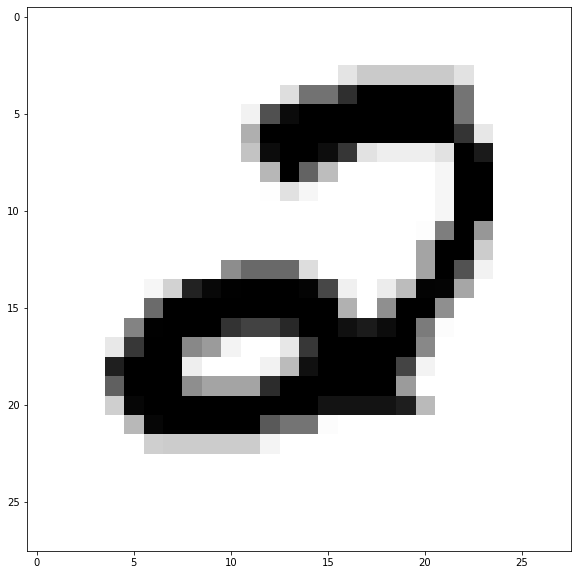

In [17]:
import random
no_images=len(X_train)

# Display random Image
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest') 

# replace random.randint(0,no_images) in code above with a number if you want to see specific image. 
#This dispalys a random image each time

plt.show()

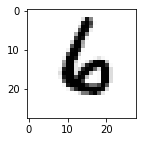

In [19]:
fig, ax = plt.subplots(figsize=(2,2))

plt.imshow(X_train[random.randint(0, no_images), :, :, 0], cmap = "Greys", interpolation = "nearest")

plt.show()

In [20]:
validation_size = 0.2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)

In [21]:
#Get one-hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes = 10)
Y_val = keras.utils.to_categorical(Y_val, num_classes = 10)

In [22]:
def CNN():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = "relu"))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation = "relu"))
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(512, activation = "relu"))

    model.add(Dense(10, activation = "softmax"))


    
    return model

In [23]:
model = CNN()

In [24]:
model.compile(optimizer = "Adam", loss = "CategoricalCrossentropy", metrics = "accuracy")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                        

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 1)

In [28]:
training = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 64, epochs = 50, verbose = 1, callbacks = [early_stop] )

Epoch 1/50
525/525 [==============================] - 30s 54ms/step - loss: 0.2180 - accuracy: 0.9315 - val_loss: 0.0863 - val_accuracy: 0.9763
Epoch 2/50
525/525 [==============================] - 29s 54ms/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 3/50
525/525 [==============================] - 26s 49ms/step - loss: 0.0426 - accuracy: 0.9862 - val_loss: 0.0629 - val_accuracy: 0.9814
Epoch 4/50
525/525 [==============================] - 21s 40ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0548 - val_accuracy: 0.9862
Epoch 5/50
525/525 [==============================] - 24s 45ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0728 - val_accuracy: 0.9802


In [29]:
metrics = pd.DataFrame(model.history.history)

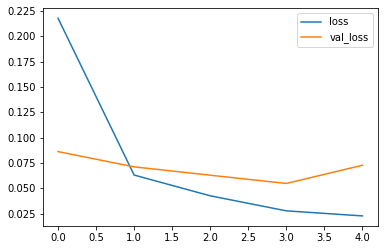

In [30]:
metrics[["loss","val_loss"]].plot()

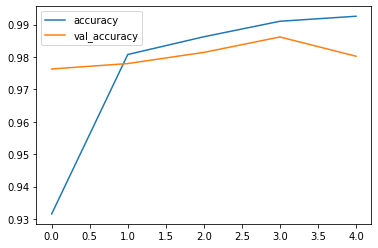

In [31]:
metrics[["accuracy", "val_accuracy"]].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
Y_val.shape

(8400, 10)

In [35]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

1/1 [==============================] - 0s 117ms/step


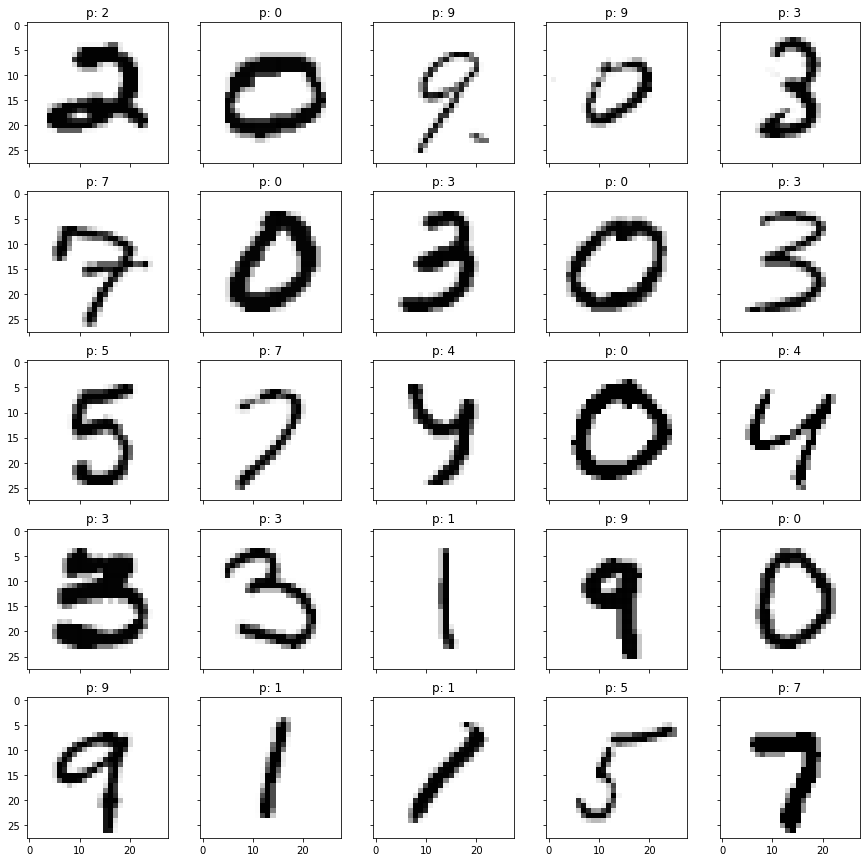

In [36]:
predict(model, X_test, 25)

In [37]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

875/875 [==============================] - 7s 8ms/step


In [38]:
file_name = "submission.csv"
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv(file_name, index=False)

In [40]:
!pip install ibm_watson_machine_learning


     ---------------------------------------- 1.8/1.8 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 52.0/52.0 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 824.6/824.6 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 133.2/133.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 547.6/547.6 kB 11.4 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=148bba8caac89d31819b11e8c7aac6fb8d651e7519a823fe4ea391d88171e466
  Stored in directory: c:\users\sneha\appdata\local\pip\cache\wheels\91\6e\62\fd04b9c6602377757314c569549239be8d6462cd712898d548
  Created

In [41]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"bPoRRqkBtFwQWBFyOs2aZhh3zKrlN6BC3Pe4Pa7k1JAW"
                  }
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [42]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [44]:
space_uid = guid_from_space_name(client, 'handwrittendigitrecognition')

In [45]:
client.set.default_space(space_uid)

In [47]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")

In [48]:
model_details = client.repository.store_model(model=handwrittendigitrecogniton,meta_props={
client.repository.ModelMetaNames.NAME:"tensorflow_2.7",
client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                             )
model_id = client.repository.get_model_uid(model_details)

In [49]:
MODEL_NAME = 'digitrecognizer'
DEPLOYMENT_NAME = 'digitrecognizer_deploy'
VISA_MODEL = cnn

In [50]:
software_spec=client.software_specifications.get_uid_by_name("default_py3.8")

In [51]:
# Set Python Version
software_spec_uid = client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [52]:
#Save model
model_details = client.repository.store_model(
    model=digitrecognizer, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [53]:
model_uid = client.repository.get_model_uid(model_details); model_uid

In [54]:
# Set meta
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [55]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)


Synchronous deployment creation for uid: '8033f104-c153-4391-a848-752a1d994ef3' started

#######################################################################################


initializingNote: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready
Successfully finished deployment creation, deployment_uid='c279006a-4245-43f7-a509-01526c007538'


------------------------------------------------------------------------------------------------